In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('E:/python xl/projects/DataMiningAnalytics DIY Project/Movies.csv', encoding='latin-1', on_bad_lines='skip')
ratings = pd.read_csv('E:/python xl/projects/DataMiningAnalytics DIY Project/Ratings.csv', on_bad_lines='skip') # Skip lines with errors
users = pd.read_csv('E:/python xl/projects/DataMiningAnalytics DIY Project/Users.csv',on_bad_lines='skip')

In [3]:
print(movies.shape)
print(ratings.shape)
print(users.shape)


(3883, 5)
(1000209, 3)
(6040, 4)


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 188.9+ KB


In [9]:
# Extract the year from the title
movies['Year'] = movies['Title'].str.extract(r'\((\d{4})\)', expand=False)
movies
# Drop rows where years is nan
movies['Year'] = pd.to_numeric(movies['Year'], errors='coerce')
movies.dropna(subset=['Year'], inplace=True)

# Change datatype 
movies['Year'] = movies['Year'].astype(int)
movies

,MovieID,Title,Category,Unnamed: 3,Unnamed: 4,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,NaN,NaN,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,NaN,NaN,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,NaN,NaN,1995
4,5,Father of the Bride Part II (1995),Comedy,NaN,NaN,1995
...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,NaN,NaN,2000
3879,3949,Requiem for a Dream (2000),Drama,NaN,NaN,2000
3880,3950,Tigerland (2000),Drama,NaN,NaN,2000
3881,3951,Two Family House (2000),Drama,NaN,NaN,2000


In [11]:
# Display distinct years
print(movies['Year'].unique())

[1995 1994 1996 1976 1993 1992 1988 1967 1964 1977 1965 1982 1962 1990
 1991 1989 1937 1940 1969 1981 1973 1970 1960 1955 1956 1959 1968 1980
 1975 1986 1948 1943 1950 1946 1987 1997 1974 1958 1949 1972 1998 1933
 1952 1951 1957 1961 1954 1934 1944 1963 1942 1941 1953 1939 1947 1945
 1938 1935 1936 1926 1932 1930 1971 1979 1966 1978 1985 1984 1983 1931
 1922 1927 1929 1928 1925 1923 1999 1919 2000 1920 1921]


In [13]:
# Split the category column into multiple rows
movies = movies.assign(Category=movies['Category'].str.split('|')).explode('Category')
movies
# # Calculate the number of movies released per year
movies_per_year = movies.groupby('Year').size().reset_index(name='Count')
print(movies_per_year)

    Year  Count
0   1919      3
1   1920      2
2   1921      1
3   1922      2
4   1923      3
..   ...    ...
76  1996    516
77  1997    508
78  1998    548
79  1999    414
80  2000    235

[81 rows x 2 columns]


In [15]:
print(movies['Category'].unique())

['Animation' "Children's" 'Comedy' 'Adventure' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Sci-Fi' 'Documentary' 'War'
 'Musical' 'Mystery' 'Film-Noir' 'Western']


In [17]:
 movies

,MovieID,Title,Category,Unnamed: 3,Unnamed: 4,Year
0,1,Toy Story (1995),Animation,NaN,NaN,1995
0,1,Toy Story (1995),Children's,NaN,NaN,1995
0,1,Toy Story (1995),Comedy,NaN,NaN,1995
1,2,Jumanji (1995),Adventure,NaN,NaN,1995
1,2,Jumanji (1995),Children's,NaN,NaN,1995
...,...,...,...,...,...,...
3879,3949,Requiem for a Dream (2000),Drama,NaN,NaN,2000
3880,3950,Tigerland (2000),Drama,NaN,NaN,2000
3881,3951,Two Family House (2000),Drama,NaN,NaN,2000
3882,3952,"Contender, The (2000)",Drama,NaN,NaN,2000


In [19]:
# Find the highest rated movie category each year
highest_rated_per_year = ratings.merge(movies, on='MovieID').groupby(['Year', 'Category'])['Rating'].mean().reset_index()
highest_rated_per_year = highest_rated_per_year.loc[highest_rated_per_year.groupby('Year')['Rating'].idxmax()]
highest_rated_per_year

,Year,Category,Rating
1,1919,Comedy,3.631579
3,1920,Comedy,3.666667
4,1921,Action,3.790323
5,1922,Horror,3.991597
6,1923,Comedy,3.444444
...,...,...,...
813,1996,Documentary,4.070608
834,1997,Film-Noir,4.171815
858,1998,War,3.918526
862,1999,Animation,4.013039


In [21]:
# Group by category, aggregate the mean rating, and sort in descending order
highest_rated_category = ratings.merge(movies, on='MovieID').groupby('Category')['Rating'].mean().sort_values(ascending=False)
highest_rated_category

Category
Film-Noir      4.075188
Documentary    3.961528
War            3.878758
Drama          3.761494
Crime          3.698460
Animation      3.691294
Musical        3.666401
Mystery        3.657400
Western        3.637770
Romance        3.603506
Thriller       3.582175
Comedy         3.534755
Action         3.489475
Fantasy        3.474930
Adventure      3.460581
Children's     3.455279
Sci-Fi         3.433917
Horror         3.285543
Name: Rating, dtype: float64

In [23]:
# Merge datasets
merged = ratings.merge(movies, on='MovieID').merge(users, on='UserID')
merged

##Find age group wise likings
age_group_likings = merged.groupby(['Age', 'Category']).size().reset_index(name='Count')
age_group_likings = age_group_likings.loc[age_group_likings.groupby('Age')['Count'].idxmax()].reset_index()
age_group_likings

,index,Age,Category,Count
0,4,1,Comedy,10718
1,22,18,Comedy,67354
2,40,25,Comedy,138998
3,61,35,Drama,69770
4,79,45,Drama,31337
5,97,50,Drama,28535
6,115,56,Drama,16880


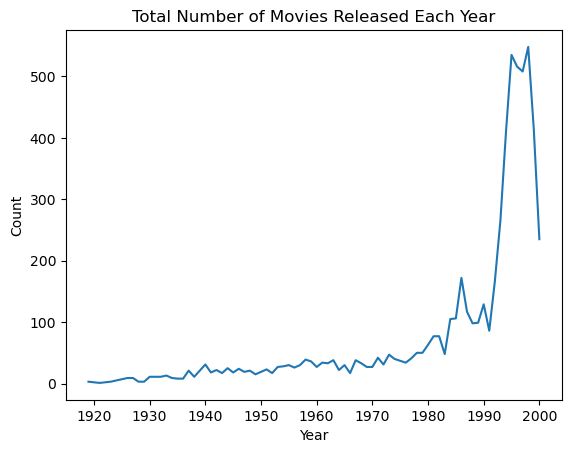

In [33]:
# Plot total number of movies released each year
sns.lineplot(data=movies_per_year, x='Year', y='Count')
plt.title('Total Number of Movies Released Each Year')
plt.show()

SyntaxError: keyword argument repeated: loc (1941709645.py, line 6)

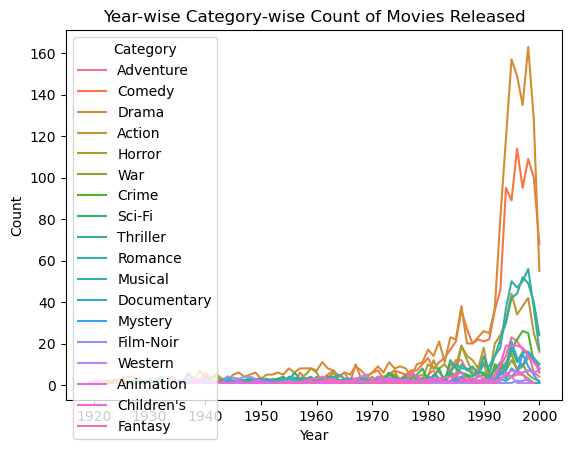

In [59]:
# Plot year-wise category-wise count of movies released
year_category_count = movies.groupby(['Year', 'Category']).size().reset_index(name='Count')
year_category_count
sns.lineplot(data=year_category_count, x='Year', y='Count', hue='Category')
plt.title('Year-wise Category-wise Count of Movies Released')
plt.legend(loc='category', bbox_to_anchor=(1.05, 1), loc='upper right') # Change the legend position 
plt.show()

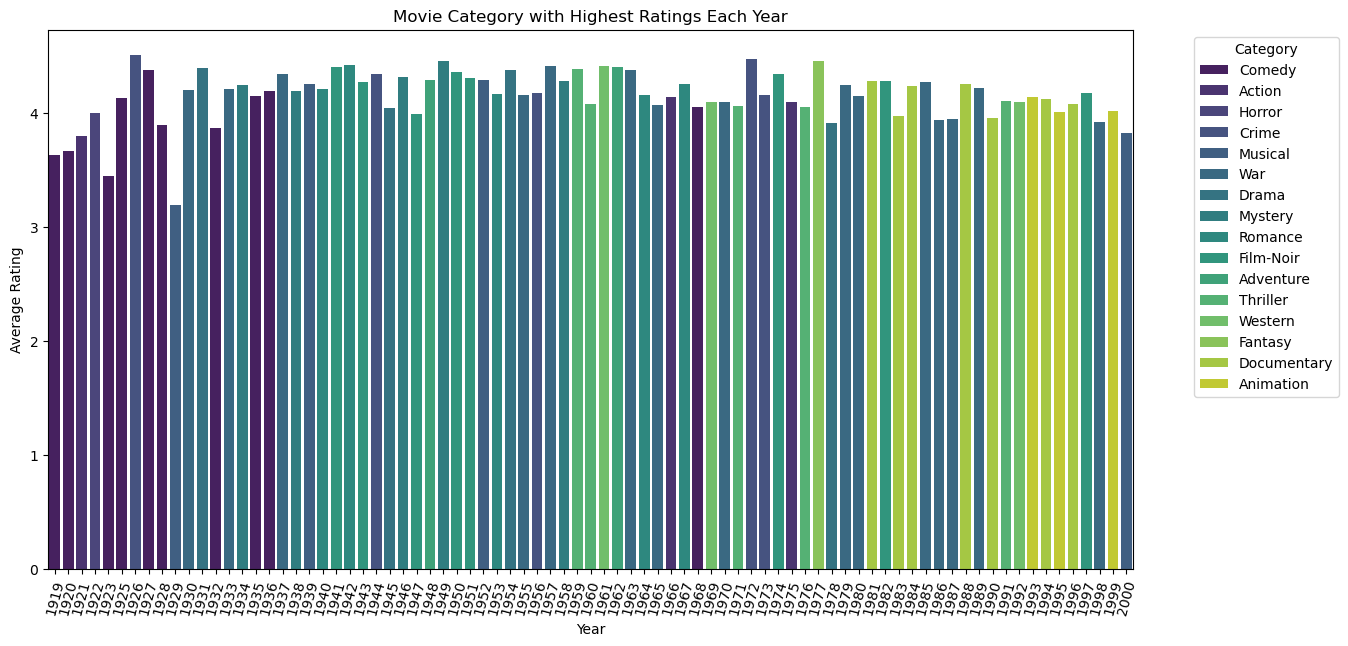

In [61]:
# Calculate the highest rating for each category per year
highest_ratings = ratings.merge(movies, on='MovieID')
highest_ratings = highest_ratings.groupby(['Year', 'Category'])['Rating'].mean().reset_index()
highest_ratings = highest_ratings.sort_values(['Year', 'Rating'], ascending=[True, False])
highest_ratings = highest_ratings.groupby('Year').first().reset_index()
highest_ratings.head(5)

# Create a bar plot for the movie category with the highest rating each year
plt.figure(figsize=(14, 7))
sns.barplot(x='Year', y='Rating', hue='Category', data=highest_rated_per_year, dodge=False, palette='viridis')
plt.title('Movie Category with Highest Ratings Each Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=75)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

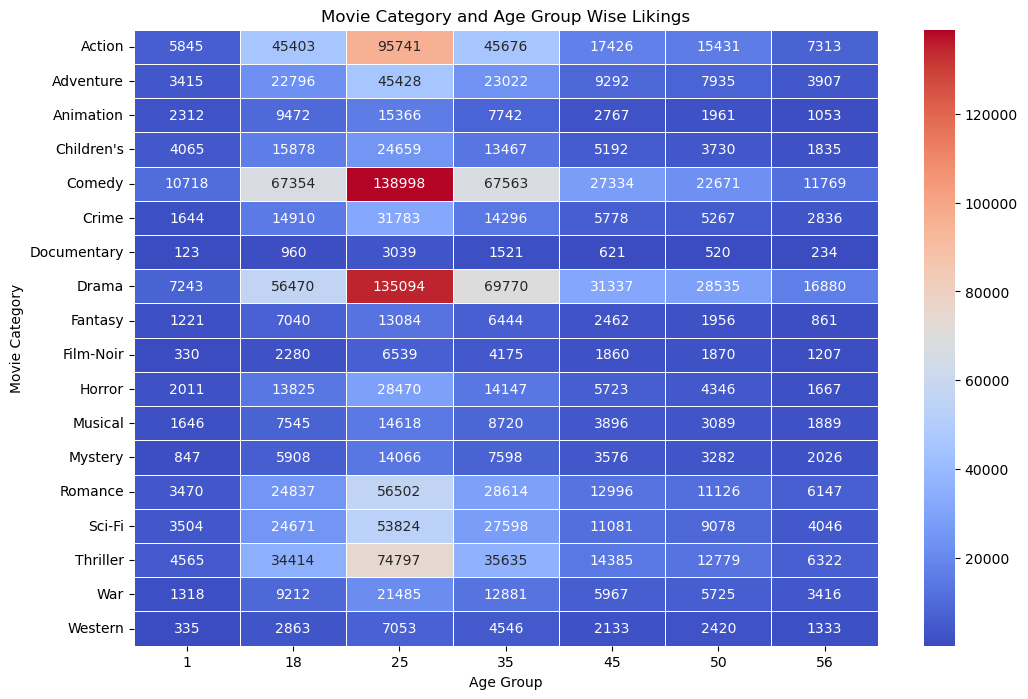

In [63]:
# Group by Category and Age and count the number of users
category_age_group_likes = ratings.merge(movies, on='MovieID')
category_age_group_likes = category_age_group_likes.merge(users, on='UserID')
category_age_group_likes = category_age_group_likes.groupby(['Category', 'Age'])['UserID'].count().unstack().fillna(0)

# Create a heatmap for movie category and age group wise likings
plt.figure(figsize=(12, 8))
sns.heatmap(category_age_group_likes, cmap='coolwarm', annot=True, fmt='d', linewidths=0.5)
plt.title('Movie Category and Age Group Wise Likings')
plt.xlabel('Age Group')
plt.ylabel('Movie Category')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4548\3587576241.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_movie_count.index, y=yearly_movie_count.values, palette='Set2')


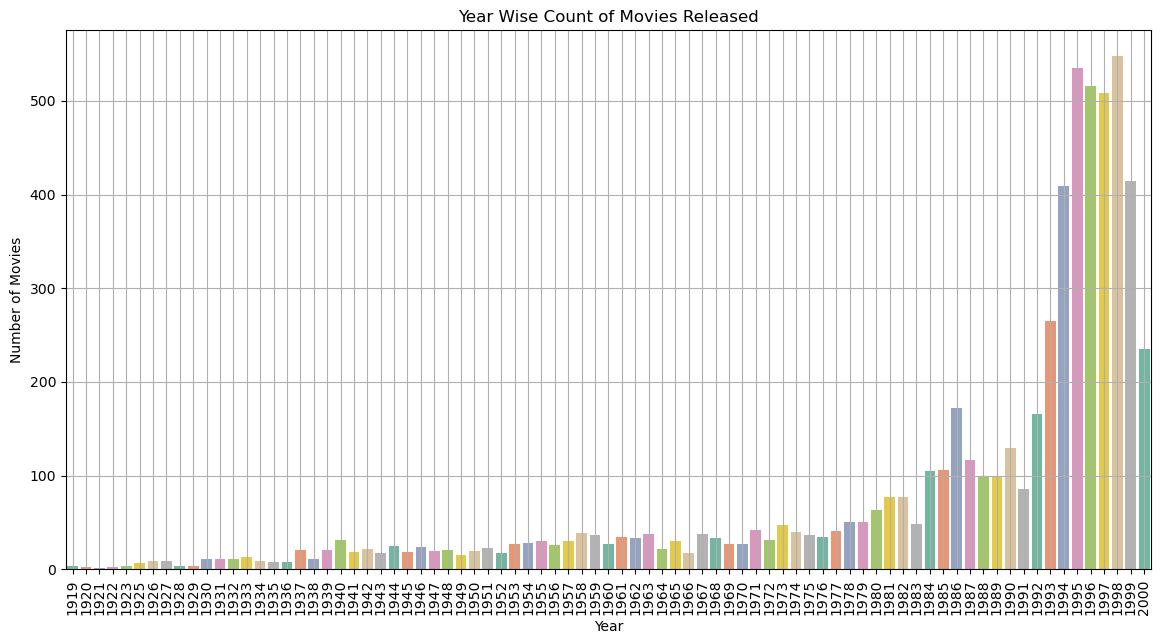

In [67]:
# Calculate the number of movies released each year
yearly_movie_count = movies['Year'].value_counts().sort_index()

# Create a bar plot for the year-wise count of movies released
plt.figure(figsize=(14, 7))
sns.barplot(x=yearly_movie_count.index, y=yearly_movie_count.values, palette='Set2')
plt.title('Year Wise Count of Movies Released')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


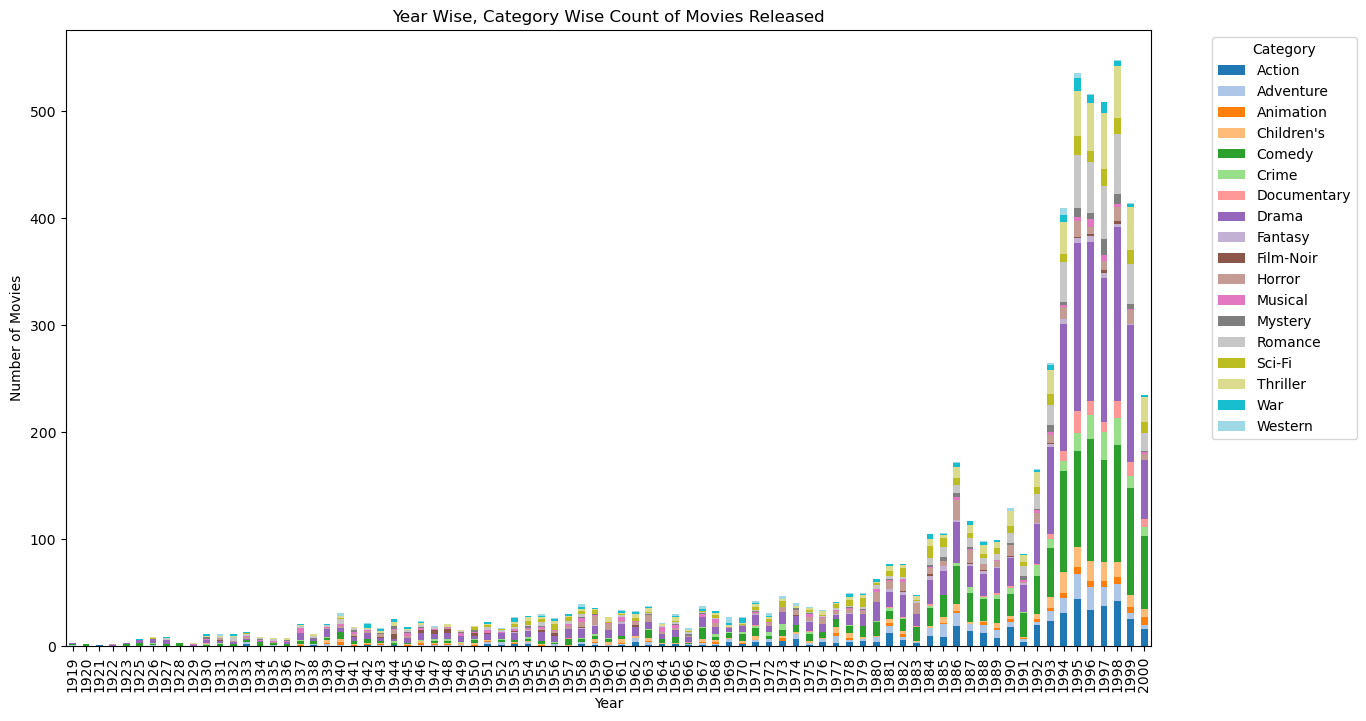

In [71]:
# Calculate the count of movies released each year by category
yearly_category_count = movies['Category'].str.get_dummies(sep='|').groupby(movies['Year']).sum()

# Create a stacked bar plot for year-wise and category-wise count of movies
yearly_category_count.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Year Wise, Category Wise Count of Movies Released')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
